In [1]:
# !pip freeze

# Initial Setup

## Installing all required libraries

In [52]:
!pip install pandas
!pip install numpy
!pip install datasets
!pip install text2emotion
!pip install textblob
!pip install spacy
!pip install matplotlib
!pip install sentence-transformers
!pip install wordcloud
!pip install corpus
!pip install gensim
# !pip install -U typing-extensions
# pip install cython
# pip install tokenizers-0.10.3
!pip install networkx

# Need to use older version of emoji as the new one has breaking changes
!pip uninstall emoji -y
!pip install emoji==1.7.0

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

## Importing all the required Libraries

In [53]:
from datasets import load_dataset, Dataset, DatasetDict
import numpy as np
import pandas as pd
import pandas as pd
import numpy as np

#for plotting images & adjusting colors
import matplotlib.pyplot as plt
import matplotlib as mpl
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/liviagonsalves/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

## Loading and Creating the dataset

In [54]:
datasets = load_dataset("huggingartists/dua-lipa")

Found cached dataset dua-lipa (/Users/liviagonsalves/.cache/huggingface/datasets/huggingartists___dua-lipa/default/1.0.0/ebf0799aab5ed80bd11eb847f5f8ec2ca801478aa1f41838ada6d5b7d5545042)
100%|██████████| 1/1 [00:00<00:00, 35.13it/s]


## Applying basic preprocessing

- Clean and recreate the dataset:
- Remove special characters
- Substitute multiple spaces with single spaces
- Convert to lower case

In [55]:
"""
Clean and recreate the dataset:
a. Remove special characters
b. Substitute multiple spaces with single spaces
c. Convert to lower case
"""

import re
def eda(sentences):
    processed_sentences = []

    for s in sentences:
        # Remove all the special characters
        processed_sentence = re.sub(r'\W', ' ', str(s))

        # Substituting multiple spaces with single space
        processed_sentence = re.sub(r'\s+', ' ', processed_sentence, flags=re.I)
        
        # Converting to Lowercase
        processed_sentence = processed_sentence.lower()

        processed_sentences.append(processed_sentence)
        
    return processed_sentences

song_data = eda(datasets['train']['text'])
print("Length of song_data :", len(song_data))
lyric_data = eda([item for sublist in [i.split('\n') for i in datasets['train']['text']] for item in sublist])
print("Length of lyric_data :", len(lyric_data))

Length of song_data : 454
Length of lyric_data : 20713


## Checking and removing any empty values 

In [56]:
import numpy as np
song_data = [song_data[i] for i in range(len(song_data)) if len(song_data[i]) > 5]
print("Length of song_data :", len(song_data))
lyric_data = [lyric_data[i] for i in range(len(lyric_data)) if len(lyric_data[i]) > 1]
print("Length of lyric_data :", len(lyric_data))

Length of song_data : 408
Length of lyric_data : 20641


## Converting all lyrics to pandas dataframe
- Here, we consider all song lines as individual rows 

In [57]:
all_dua_lyrics = pd.DataFrame([item for sublist in [i.split('\n') for i in lyric_data] for item in sublist])
all_dua_lyrics.columns = ["Line_Lyrics"]
all_dua_lyrics.head(5)

Line_Lyrics
0                                one one one one one
1     talkin in my sleep at night makin myself crazy
2  wrote it down and read it out hopin it would s...
3  my love he makes me feel like nobody else nobo...
4  but my love he doesnt love me so i tell myself...

## Converting all songs to pandas dataframe
- Here, we consider all songs as individual rows 

In [58]:
all_dua_songs = pd.DataFrame(song_data)
all_dua_songs.columns = ["Song_Lyrics"]
all_dua_songs.head(5)

Song_Lyrics
0  one one one one one talkin in my sleep at nigh...
1  it was great at the very start hands on each o...
2  if you dont wanna see me did a full one eighty...
3  you call me all friendly tellin me how much yo...
4  one kiss is all it takes fallin in love with m...

## Saving both the dataframes

In [59]:
all_dua_songs.to_csv("all_dua_songs.csv")
all_dua_lyrics.to_csv("all_dua_lyrics.csv")

# Analysis 1 : Finding the emotions of Dua Lipa Song Lyrics 

In [60]:
# Download NLTK dependency
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/liviagonsalves/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [61]:
# Getting list of emotions for every song 
# import text2emotion as te
# from tqdm import tqdm

# emotions = []
# for cleaned_song in tqdm(all_dua_songs.values):
#     emotions.append(te.get_emotion(cleaned_song[0]))

# Note : Commmenting this as it takes time and I have saved the dataframe it makes

In [62]:
# Converting the same into a dataframe
# emotions_df = pd.DataFrame(emotions)
# emotions_df.head()

# Note : Commmenting this as it takes time and I have saved the dataframe it makes

In [63]:
# joining with master df
# all_dua_songs_emotion = all_dua_songs.join(emotions_df)
# all_dua_songs_emotion.head(5)

# Note : Commmenting this as it takes time and I have saved the dataframe it makes

In [64]:
# saving the dataframe
# all_dua_songs_emotion.to_csv("all_dua_songs_emotion.csv")

# Note : Commmenting this as it takes time and I have saved the dataframe it makes

In [65]:
all_dua_songs_emotion = pd.read_csv("all_dua_songs_emotion.csv", index_col=0)
all_dua_songs_emotion.head(5)

Song_Lyrics  Happy  Angry  Surprise  \
0  one one one one one talkin in my sleep at nigh...   0.29   0.00      0.07   
1  it was great at the very start hands on each o...   0.02   0.04      0.26   
2  if you dont wanna see me did a full one eighty...   0.00   0.25      0.00   
3  you call me all friendly tellin me how much yo...   0.31   0.07      0.07   
4  one kiss is all it takes fallin in love with m...   0.36   0.04      0.36   

    Sad  Fear  
0  0.10  0.54  
1  0.66  0.02  
2  0.53  0.22  
3  0.29  0.27  
4  0.25  0.00

In [66]:
text = all_dua_songs_emotion['Song_Lyrics'].tolist()
text = ' '.join(text).lower()

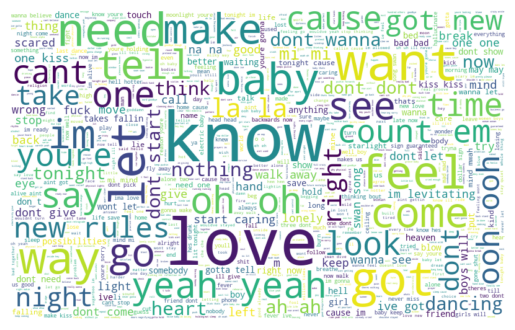

In [67]:
#creating a wordcloud of all words
wordcloud = WordCloud(width=800, height=500, max_font_size=110, background_color="white", max_words=3000, 
                      contour_width=3, contour_color='steelblue',stopwords = STOPWORDS,
                      collocations=True).generate(text)
#plot the wordcloud object
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

In [68]:
#Define your list of columns
cols = ['Happy', 'Angry', 'Surprise', 'Sad', 'Fear']
# calculating sum of values
emo_sum = dict(all_dua_songs_emotion[cols].sum(axis=0))
emo_sum

{'Happy': 66.09,
 'Angry': 36.19,
 'Surprise': 74.19999999999999,
 'Sad': 128.51,
 'Fear': 91.88}

In [69]:
# Standardizing the values for base 100
emo_sum_dict = {key:(value*100)/len(all_dua_songs_emotion) for key,value in emo_sum.items()}
emo_sum_dict

{'Happy': 16.198529411764707,
 'Angry': 8.870098039215685,
 'Surprise': 18.18627450980392,
 'Sad': 31.497549019607842,
 'Fear': 22.519607843137255}

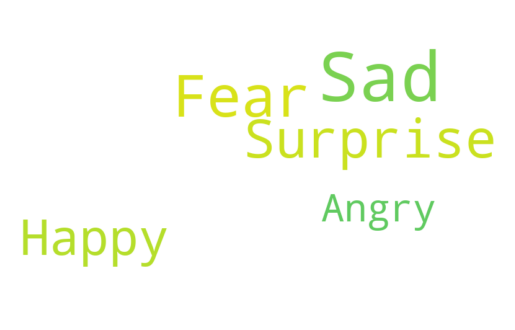

In [70]:
#creating a wordcloud of all emotions
wordcloud.generate_from_frequencies(emo_sum_dict)
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

In [71]:
sid = SentimentIntensityAnalyzer()
all_dua_songs_emotion = all_dua_songs_emotion.join(pd.json_normalize(all_dua_songs_emotion["Song_Lyrics"].apply(sid.polarity_scores)))
all_dua_songs_emotion = all_dua_songs_emotion.rename(columns={"neg": "Negative Valence", "pos": "Positive Valence", "neu": "Neutral Valence", "compound": "Compound"})
all_dua_songs_emotion.head(5)

Song_Lyrics  Happy  Angry  Surprise  \
0  one one one one one talkin in my sleep at nigh...   0.29   0.00      0.07   
1  it was great at the very start hands on each o...   0.02   0.04      0.26   
2  if you dont wanna see me did a full one eighty...   0.00   0.25      0.00   
3  you call me all friendly tellin me how much yo...   0.31   0.07      0.07   
4  one kiss is all it takes fallin in love with m...   0.36   0.04      0.36   

    Sad  Fear  Negative Valence  Neutral Valence  Positive Valence  Compound  
0  0.10  0.54             0.095            0.828             0.077   -0.4393  
1  0.66  0.02             0.230            0.703             0.067   -0.9947  
2  0.53  0.22             0.146            0.818             0.036   -0.9870  
3  0.29  0.27             0.149            0.665             0.186    0.9767  
4  0.25  0.00             0.019            0.707             0.274    0.9980

In [72]:
from textblob import TextBlob
all_dua_songs_emotion = all_dua_songs_emotion.join(pd.json_normalize(all_dua_songs_emotion["Song_Lyrics"].apply(lambda x: { "Subjectivity" : TextBlob(x).sentiment.subjectivity, "Polarity" : TextBlob(x).sentiment.polarity })))
all_dua_songs_emotion.head(5)

Song_Lyrics  Happy  Angry  Surprise  \
0  one one one one one talkin in my sleep at nigh...   0.29   0.00      0.07   
1  it was great at the very start hands on each o...   0.02   0.04      0.26   
2  if you dont wanna see me did a full one eighty...   0.00   0.25      0.00   
3  you call me all friendly tellin me how much yo...   0.31   0.07      0.07   
4  one kiss is all it takes fallin in love with m...   0.36   0.04      0.36   

    Sad  Fear  Negative Valence  Neutral Valence  Positive Valence  Compound  \
0  0.10  0.54             0.095            0.828             0.077   -0.4393   
1  0.66  0.02             0.230            0.703             0.067   -0.9947   
2  0.53  0.22             0.146            0.818             0.036   -0.9870   
3  0.29  0.27             0.149            0.665             0.186    0.9767   
4  0.25  0.00             0.019            0.707             0.274    0.9980   

   Subjectivity  Polarity  
0      0.651192  0.098869  
1      0.642742  0.057258  
2      0.502273  0.047727  
3      0.607143 -0.087143  
4      0.625000  0.466667

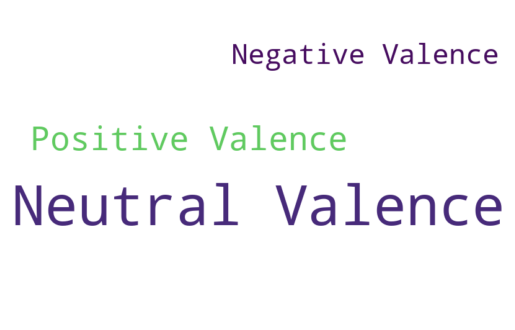

In [73]:
#Define your list of columns
cols = ["Negative Valence", "Neutral Valence", "Positive Valence"]
# calculating sum of values
emo_sum_2 = dict(all_dua_songs_emotion[cols].sum(axis=0))

#creating a wordcloud of all emotions
wordcloud.generate_from_frequencies(emo_sum_2)
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

In [74]:
# saving to csv 
all_dua_songs_emotion.to_csv("all_dua_songs_emotion_2.csv")

# Analysis 2: Network Model - Page Rank ##

In [75]:
from sentence_transformers import SentenceTransformer

In [76]:
bmodel = SentenceTransformer('all-MiniLM-L6-v2') #384 dims

In [77]:
bert_embeddings = bmodel.encode(all_dua_songs_emotion["Song_Lyrics"])
bert_embeddings.shape

(408, 384)

In [78]:
#Print the embeddings
for i, (sentence, embedding) in enumerate(zip(all_dua_songs_emotion["Song_Lyrics"], bert_embeddings)):
    print("Sentence:", sentence)
    print("Embedding:", embedding)
    print("")
    if i == 3: break

Sentence: one one one one one talkin in my sleep at night makin myself crazy wrote it down and read it out hopin it would save me my love he makes me feel like nobody else nobody else but my love he doesnt love me so i tell myself i tell myself one dont pick up the phone you know hes only callin cause hes drunk and alone two dont let him in youll have to kick him out again three dont be his friend you know youre gonna wake up in his bed in the morning and if youre under him you aint gettin over him i got new rules i count em i got new rules i count em i gotta tell them to myself i got new rules i count em i gotta tell them to myself i keep pushin forwards but he keeps pullin me backwards now im standin back from it i finally see the pattern but my love he doesnt love me so i tell myself i tell myself i do i do i do one dont pick up the phone you know hes only callin cause hes drunk and alone two dont let him in youll have to kick him out again three dont be his friend you know youre go

In [79]:
# Computing cosine similarity between all the vectors
import numpy as np
a = bert_embeddings[0]
b = bert_embeddings[1]
cos_sim = (a @ b.T) / (np.linalg.norm(a)*np.linalg.norm(b))
cos_sim

0.39961377

In [80]:
from tqdm import tqdm
M = np.eye(408)
for i,a in tqdm(enumerate(bert_embeddings)):
    for j,b in enumerate(bert_embeddings):
        if i != j:
            M[i,j] = (a @ b.T) / (np.linalg.norm(a)*np.linalg.norm(b))
M

408it [00:01, 239.22it/s]


array([[1.        , 0.39961377, 0.50849825, ..., 0.51575631, 0.42180297,
        0.45639366],
       [0.39961377, 1.        , 0.50583273, ..., 0.51319611, 0.44668928,
        0.48545626],
       [0.50849825, 0.50583273, 1.        , ..., 0.99323136, 0.60637259,
        0.55415195],
       ...,
       [0.51575631, 0.51319611, 0.99323136, ..., 1.        , 0.60787743,
        0.5544042 ],
       [0.42180297, 0.44668928, 0.60637259, ..., 0.60787743, 1.        ,
        0.54365319],
       [0.45639366, 0.48545626, 0.55415195, ..., 0.5544042 , 0.54365319,
        1.        ]])

In [81]:
import networkx
similarity_graph = networkx.from_numpy_array(M)
similarity_graph

In [82]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(100, 20))
networkx.r(similarity_graph, node_color='lime')

AttributeError: module networkx has no attribute r

<Figure size 10000x2000 with 0 Axes>

In [85]:
# !pip install scipy==1.8.0

In [86]:
scores = networkx.pagerank(similarity_graph)
nx_ranked_sentences = sorted(((score, index, all_dua_songs_emotion["Song_Lyrics"][index]) 
                              for index, score in scores.items()), 
                          reverse=True)
nx_ranked_sentences[:10]

[(0.002908320351216305,
  167,
  'are you ready one kiss is all it takes fallin in love with me possibilities i look like all you need one kiss is all it takes fallin in love with me possibilities i look like all you need let me take the night i love real easy and i know that youll still wanna see me on the sunday morning music real loud let me love you while the moon is still out something in you lit up heaven in me the feeling wont let me sleep cause im lost in the way you move the way you feel one kiss is all it takes fallin in love with me possibilities i look like all you need one kiss is all it takes fallin in love with me possibilities i look like all you need i look like all you need i look like all you need baby girl yuh a carry ten ton a phatness gimme some a dat mixed wid the badness look how she hot shaped like goddess but a nah jus dat good piece a mentals under di cap hot piece of frame an mi love how yuh trod watching every step a di pepper deh whe yuh got stayin in ma b

## Variation 2: For individual song lyrics 

In [87]:
all_dua_lyrics = pd.read_csv("all_dua_lyrics.csv", index_col=0)
all_dua_lyrics.head()

Line_Lyrics
0                                one one one one one
1     talkin in my sleep at night makin myself crazy
2  wrote it down and read it out hopin it would s...
3  my love he makes me feel like nobody else nobo...
4  but my love he doesnt love me so i tell myself...

In [88]:
from sentence_transformers import SentenceTransformer

In [89]:
bmodel = SentenceTransformer('all-MiniLM-L6-v2') #384 dims

In [90]:
# bert_embeddings = bmodel.encode(all_dua_lyrics["Line_Lyrics"])
# bert_embeddings.shape

In [91]:
# #Print the embeddings
# for i, (sentence, embedding) in enumerate(zip(all_dua_lyrics["Line_Lyrics"], bert_embeddings)):
#     print("Sentence:", sentence)
#     print("Embedding:", embedding)
#     print("")
#     if i == 3: break

In [92]:
# # Computing cosine similarity between all the vectors
# import numpy as np
# a = bert_embeddings[0]
# b = bert_embeddings[1]
# cos_sim = (a @ b.T) / (np.linalg.norm(a)*np.linalg.norm(b))
# cos_sim

In [93]:
# from tqdm import tqdm
# M = np.eye(20641)
# for i,a in tqdm(enumerate(bert_embeddings)):
#     for j,b in enumerate(bert_embeddings):
#         if i != j:
#             M[i,j] = (a @ b.T) / (np.linalg.norm(a)*np.linalg.norm(b))
# M

In [94]:
# np.savetxt('cosin_sim.csv', M, delimiter=',')

In [95]:
# import networkx
# similarity_graph = networkx.from_numpy_array(M)
# similarity_graph

In [96]:
# import matplotlib.pyplot as plt
# %matplotlib inline

# plt.figure(figsize=(100, 20))
# networkx.draw_networkx(similarity_graph, node_color='lime')

In [97]:
# scores = networkx.pagerank(similarity_graph)
# nx_ranked_sentences = sorted(((score, index, all_dua_lyrics["Line_Lyrics"][index]) 
#                               for index, score in scores.items()), 
#                           reverse=True)
# nx_ranked_sentences[:10]

### Now why is this incorrect ? 
- *Well, When we create a BERT Model embedding, it gets trained on contextual data, hence single lines of lyrics ( which by the way results in 10.8 GB data file ), thus its better to work with entire songs.*

# Analysis 3: Computational Model using PyMC3 ##

In [98]:
all_dua_lyrics['NumWords'] = all_dua_lyrics['Line_Lyrics'].apply(lambda x: len(x.split()))
all_dua_lyrics.head(5)

Line_Lyrics  NumWords
0                                one one one one one         5
1     talkin in my sleep at night makin myself crazy         9
2  wrote it down and read it out hopin it would s...        12
3  my love he makes me feel like nobody else nobo...        11
4  but my love he doesnt love me so i tell myself...        14

Text(0.5, 1.0, 'Distribution of number of words in each sentence')

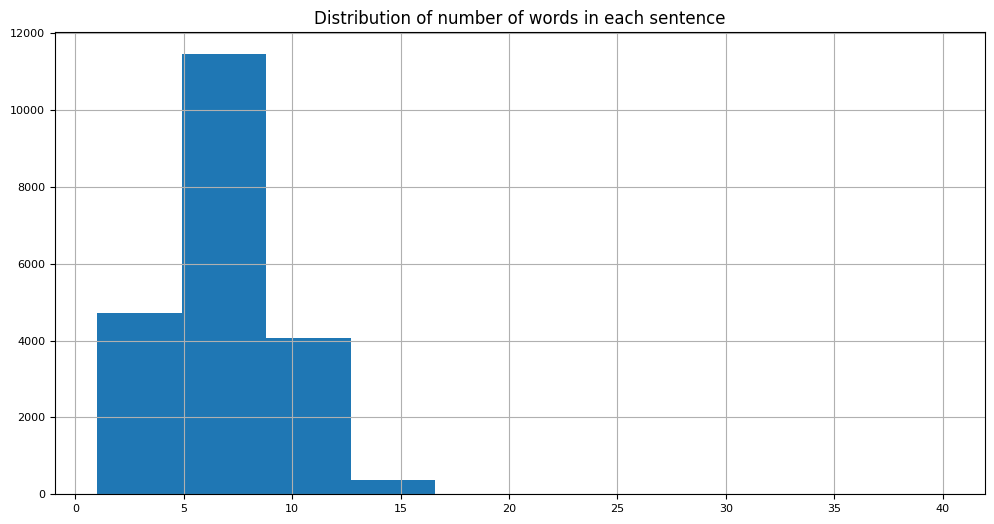

In [99]:
all_dua_lyrics[['NumWords']].hist(figsize=(12, 6), bins=10, xlabelsize=8, ylabelsize=8);
plt.title("Distribution of number of words in each sentence")

In [100]:
all_words = ''.join([word for word in all_dua_lyrics['Line_Lyrics']]).replace('\n', ' ')
all_words[0:1000]

'one one one one onetalkin in my sleep at night makin myself crazywrote it down and read it out hopin it would save memy love he makes me feel like nobody else nobody elsebut my love he doesnt love me so i tell myself i tell myselfone dont pick up the phoneyou know hes only callin cause hes drunk and alonetwo dont let him inyoull have to kick him out againthree dont be his friendyou know youre gonna wake up in his bed in the morningand if youre under him you aint gettin over himi got new rules i count emi got new rules i count emi gotta tell them to myselfi got new rules i count emi gotta tell them to myselfi keep pushin forwards but he keeps pullin me backwardsnow im standin back from it i finally see the patternbut my love he doesnt love me so i tell myself i tell myselfi do i do i doone dont pick up the phoneyou know hes only callin cause hes drunk and alonetwo dont let him inyoull have to kick him out againthree dont be his friendyou know youre gonna wake up in his bed in the morni

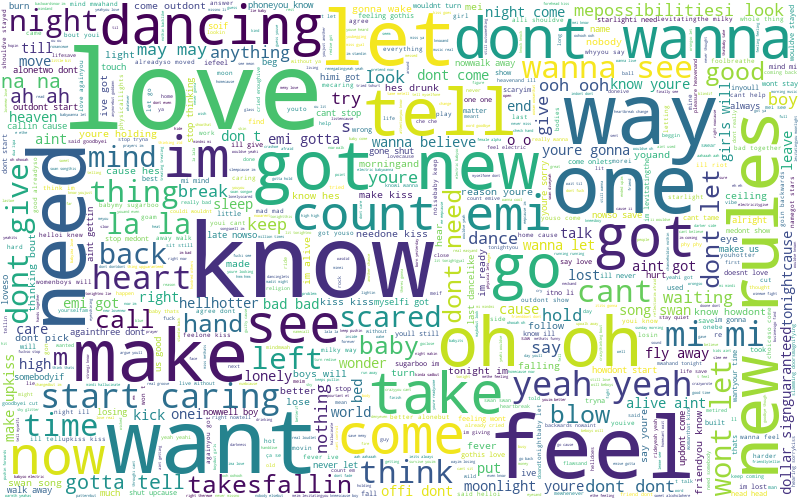

In [101]:
from wordcloud import WordCloud

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=500, max_font_size=110, background_color="white", max_words=3000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(all_words)

# Visualize the word cloud
wordcloud.to_image()

In [102]:
import re
NON_ALPHANUM = re.compile(r'[\W]')
NON_ASCII = re.compile(r'[^a-z0-1\s]')
def normalize_texts(texts):
    normalized_texts = ''
    lower = texts.lower()
    no_punctuation = NON_ALPHANUM.sub(r' ', lower)
    no_non_ascii = NON_ASCII.sub(r'', no_punctuation)
    return no_non_ascii
  
all_dua_lyrics['Normalize_Lyrics'] = all_dua_lyrics['Line_Lyrics'].apply(normalize_texts)
all_dua_lyrics.head()

Line_Lyrics  NumWords  \
0                                one one one one one         5   
1     talkin in my sleep at night makin myself crazy         9   
2  wrote it down and read it out hopin it would s...        12   
3  my love he makes me feel like nobody else nobo...        11   
4  but my love he doesnt love me so i tell myself...        14   

                                    Normalize_Lyrics  
0                                one one one one one  
1     talkin in my sleep at night makin myself crazy  
2  wrote it down and read it out hopin it would s...  
3  my love he makes me feel like nobody else nobo...  
4  but my love he doesnt love me so i tell myself...

In [103]:
all_dua_lyrics['Normalize_Lyrics'] = all_dua_lyrics['Normalize_Lyrics'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))
all_dua_lyrics.head()

Line_Lyrics  NumWords  \
0                                one one one one one         5   
1     talkin in my sleep at night makin myself crazy         9   
2  wrote it down and read it out hopin it would s...        12   
3  my love he makes me feel like nobody else nobo...        11   
4  but my love he doesnt love me so i tell myself...        14   

                               Normalize_Lyrics  
0                           one one one one one  
1         talkin sleep night makin myself crazy  
2      wrote down and read out hopin would save  
3  love makes feel like nobody else nobody else  
4  but love doesnt love tell myself tell myself

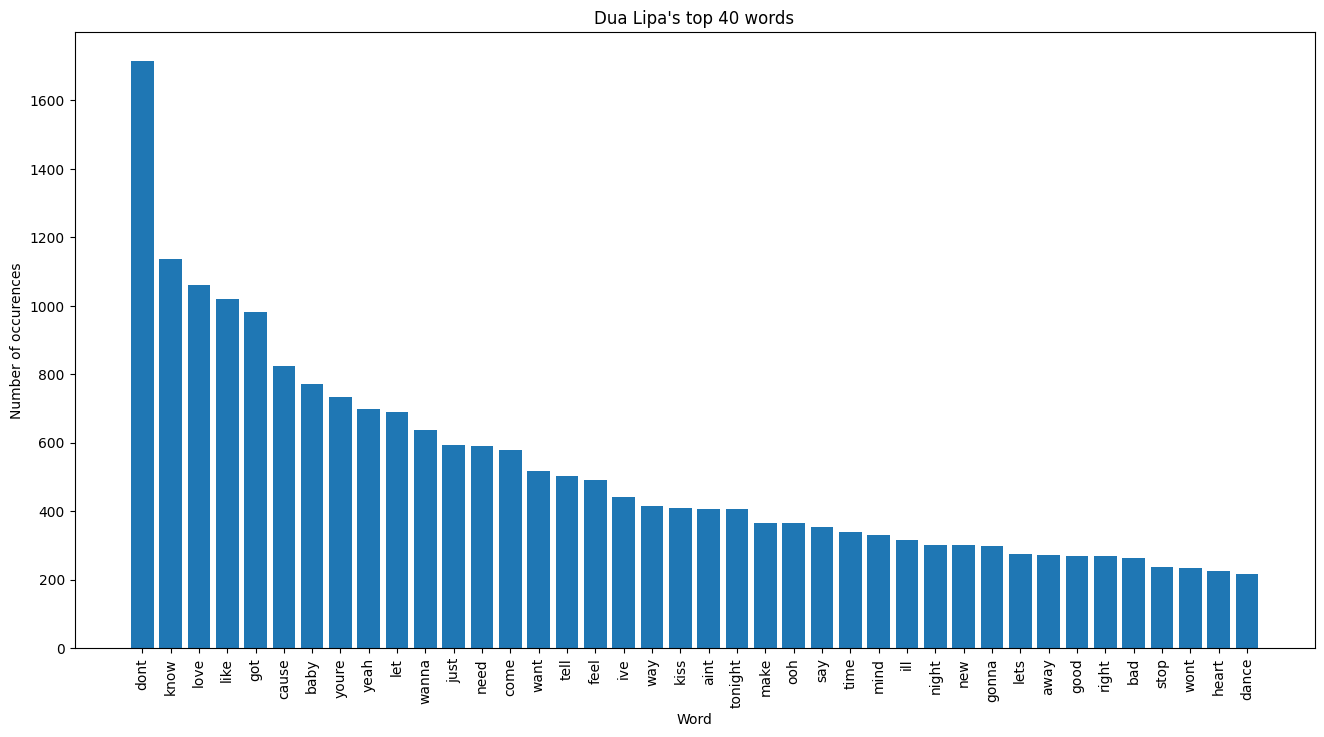

In [104]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

def get_top_n_words(corpus, n=10):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

words = []
word_values = []
for i,j in get_top_n_words(all_dua_lyrics['Normalize_Lyrics'], 40):
    words.append(i)
    word_values.append(j)
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values);
ax.set_xticks(range(len(words)));
ax.set_xticklabels(words, rotation='vertical');
ax.set_title("Dua Lipa's top 40 words");
ax.set_xlabel('Word');
ax.set_ylabel('Number of occurences');
plt.show()

In [105]:
all_dua_lyrics.to_csv("all_dua_lyrics_2.csv")

In [106]:
all_dua_lyrics = pd.read_csv("all_dua_lyrics_2.csv", index_col=0)
all_dua_lyrics.head()

Line_Lyrics  NumWords  \
0                                one one one one one         5   
1     talkin in my sleep at night makin myself crazy         9   
2  wrote it down and read it out hopin it would s...        12   
3  my love he makes me feel like nobody else nobo...        11   
4  but my love he doesnt love me so i tell myself...        14   

                               Normalize_Lyrics  
0                           one one one one one  
1         talkin sleep night makin myself crazy  
2      wrote down and read out hopin would save  
3  love makes feel like nobody else nobody else  
4  but love doesnt love tell myself tell myself

In [107]:
import spacy

# Process `text` with Spacy NLP Parser
text = '. '.join(all_dua_lyrics["Line_Lyrics"])
text

'one one one one one. talkin in my sleep at night makin myself crazy. wrote it down and read it out hopin it would save me. my love he makes me feel like nobody else nobody else. but my love he doesnt love me so i tell myself i tell myself. one dont pick up the phone. you know hes only callin cause hes drunk and alone. two dont let him in. youll have to kick him out again. three dont be his friend. you know youre gonna wake up in his bed in the morning. and if youre under him you aint gettin over him. i got new rules i count em. i got new rules i count em. i gotta tell them to myself. i got new rules i count em. i gotta tell them to myself. i keep pushin forwards but he keeps pullin me backwards. now im standin back from it i finally see the pattern. but my love he doesnt love me so i tell myself i tell myself. i do i do i do. one dont pick up the phone. you know hes only callin cause hes drunk and alone. two dont let him in. youll have to kick him out again. three dont be his friend. 

In [108]:
!python3 -m spacy download en_core_web_sm

# nlp = spacy.load('en')
nlp = spacy.load("en_core_web_sm")

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 38.9 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [109]:
processed_text = nlp(text)

In [110]:
# dir(processed_text)

In [111]:
# How many sentences are in the the text
sentences = [s for s in processed_text.sents]
print(len(sentences))

# Print sentences from index 10 to index 15, to make sure that we have parsed it correctly
print(sentences[10:15])

21859
[three dont be his friend., you know youre gonna wake up in his bed in the morning., and if youre under him you aint gettin over him., i got new rules i count em., i got new rules i count em.]


In [112]:
# processed_text

In [114]:
# Extract all the personal names and count their occurrences. 
# Expected output is a list in the following form: [('xxx', 622), ('yyy', 312), ('zzz', 286), ...].

from collections import Counter, defaultdict

def find_all_label_occurences(doc):
    """
    Return a list of actors from `doc` with corresponding occurences.
    
    :param doc: Spacy NLP parsed document
    :return: list of tuples in form
        [('xxx', 622), ('yyy', 312), ('zzz', 286), ...]
    """
    
    label = Counter()
    characters = Counter()
    cardinal = Counter()
    time = Counter()
    date = Counter()
    org = Counter()
    norp = Counter()
    for ent in doc.ents:
        label[ent.label_] += 1
        if ent.label_ == 'PERSON':
            characters[ent.lemma_] += 1
        elif ent.label_ == 'CARDINAL':
            cardinal[ent.lemma_] += 1
        elif ent.label_ == 'TIME':
            time[ent.lemma_] += 1
        elif ent.label_ == 'DATE':
            date[ent.lemma_] += 1
        elif ent.label_ == 'ORG':
            org[ent.lemma_] += 1
        elif ent.label_ == 'NORP':
            norp[ent.lemma_] += 1
    print(label)
    print()
    print(characters.most_common())
    print()
    print(cardinal.most_common())
    print()
    print(time.most_common())
    print()
    print(date.most_common())
    print()
    print(org.most_common())
    print()
    print(norp.most_common())
    print()
    return characters.most_common()

print(find_character_occurences(processed_text)[:20])

NameError: name 'find_character_occurences' is not defined

In [115]:
# Plot characters' mentions as a time series relative to the position of the actor's occurrence in a book.

def get_time_offsets(doc):
    """
    For every character in a `doc` collect all the occurences offsets and store them into a list. 
    The function returns a dictionary that has actor lemma as a key and list of occurences as a value for every character.
    
    :param doc: Spacy NLP parsed document
    :return: dict object in form
        [('xxx', 622), ('yyy', 312), ('zzz', 286), ...]
    """
    
    character_offsets = defaultdict(list)
    for ent in doc.ents:
        if ent.label_ == 'TIME':
            character_offsets[ent.lemma_].append(ent.start)
            
    return dict(character_offsets)

time_occurences = get_character_offsets(processed_text)

NameError: name 'get_character_offsets' is not defined

In [116]:
print(list(time_occurences.keys()))

NameError: name 'time_occurences' is not defined

In [ ]:
[x for x in list(time_occurences.keys()) if any([x.startswith(y) for y in ['night', 'morning']])]

In [ ]:
doc = processed_text

keywords = Counter()
for chunk in doc.noun_chunks:
    if nlp.vocab[chunk.lemma_].prob < - 8: # probablity value -8 is arbitrarily selected threshold
        keywords[chunk.lemma_] += 1

# keywords.most_common(20)
keywords

In [ ]:
list(np.array([1,2,3]))

In [ ]:
# character_occurences

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import hist
from cycler import cycler

NUM_BINS = 10

def normalize(occurencies, normalization_constant):
    return [o / float(len(processed_text)) for o in occurencies]

def plot_character_timeseries(character_offsets, character_labels, normalization_constant=None):
    """
    Plot characters' personal names specified in `character_labels` list as time series.
    
    :param character_offsets: dict object in form {'xxx': [123, 543, 4534], 'yyy': [205, 2111]}
    :param character_labels: list of strings that should match some of the keys in `character_offsets`
    :param normalization_constant: int
    """ 
    x = [character_offsets[character_label] for character_label in character_labels] 
    with plt.style.context('fivethirtyeight'):
        plt.figure()
        n, bins, patches = plt.hist(x, NUM_BINS, label=character_labels)
        plt.clf()
        ax = plt.subplot(111)
        for i, a in enumerate(n):
            print(character_labels)
            ax.plot([float(x) / (NUM_BINS - 1) for x in range(len(a))], a, label=character_labels[int(i)])
            
        plt.rcParams['axes.prop_cycle'] = cycler(color=['r','k','c','b','y','m','g','#54a1FF'])
        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#plot_character_timeseries(character_occurences, ['darcy', 'bingley'], normalization_constant=len(processed_text))
plot_character_timeseries(character_occurences, ['night', 'morning'])

In [ ]:
dua_paragraphs = list(pd.read_csv("all_dua_songs.csv", index_col=0).values.flatten())

In [ ]:
def get_words_paragraphs(paragraphs, words):
    
    word_para = defaultdict(list)
    for p in dua_paragraphs:
        for w in words:
            word_para[w].append(p.count(w))
            
    return dict(word_para)

morning_night_occurences = get_words_paragraphs(dua_paragraphs, ['night', 'morning'])
night_occurences = [v for k,v in morning_night_occurences.items() if k == 'night'][0]
morning_occurences = [v for k,v in morning_night_occurences.items() if k == 'morning'][0]
plt.plot(night_occurences)
plt.plot(morning_occurences)

In [ ]:
positive_words = []
with open("pos_words.txt", "r") as input:
    pair_lines = input.read().split(",")
pair_lines[:10]
for p in pair_lines:
    positive_words.append(p.split('\t')[0])
print(positive_words[:10])

In [ ]:
from tqdm import tqdm
def get_any_words_paragraphs(paragraphs, words):
    
    word_para = []
    for p in tqdm(paragraphs):
        total = 0
        for w in words:
            total += p.count(w)
        word_para.append(total)
            
    return word_para

positive_occurences = get_any_words_paragraphs(dua_paragraphs, positive_words)
plt.plot(positive_occurences)

In [ ]:
plt.plot(morning_occurences)
plt.plot(night_occurences)
plt.plot([m / 4 for m in  positive_occurences])

In [ ]:
bool_morning_occurences = [bool(v) for v in morning_occurences]
bool_night_occurences = [bool(v) for v in night_occurences]

In [ ]:
df_pos = pd.DataFrame(list(zip(positive_occurences, morning_occurences, night_occurences)), 
                        columns =['positive', 'morning', 'night'])
df_pos

## Creating a negative binomial model

In [ ]:
!pip uninstall scipy -y
# !pip uninstall pymc3 -y
!pip install pymc3
# !pip install scipy==1.7.4

In [ ]:
import numpy as np
import pandas as pd
import pymc3 as pm
from scipy import stats
from scipy import optimize
import matplotlib.pyplot as plt
import seaborn as sns
import re

%matplotlib inline

In [ ]:
fml = 'positive ~ morning + night + morning:night'

with pm.Model() as model:
    pm.glm.GLM.from_formula(formula=fml, data=df_pos, family=pm.glm.families.NegativeBinomial())
    trace = pm.sample(4000, cores=2)

In [ ]:
def plot_traces(trcs, varnames=None):
    '''Plot traces with overlaid means and values'''

    nrows = len(trcs.varnames)
    if varnames is not None:
        nrows = len(varnames)

    ax = pm.traceplot(trcs, var_names=varnames, figsize=(12,nrows*1.4),
                      lines={k: v['mean'] for k, v in
                             pm.summary(trcs,var_names=varnames).iterrows()})

    for i, mn in enumerate(pm.summary(trcs, var_names=varnames)['mean']):
        ax[i,0].annotate('{:.2f}'.format(mn), xy=(mn,0), xycoords='data',
                         xytext=(5,10), textcoords='offset points', rotation=90,
                         va='bottom', fontsize='large', color='#AA0022')

def strip_derived_rvs(rvs):
    '''Remove PyMC3-generated RVs from a list'''

    ret_rvs = []
    for rv in rvs:
        if not (re.search('_log',rv.name) or re.search('_interval',rv.name)):
            ret_rvs.append(rv)
    return ret_rvs

In [ ]:
rvs = [rv.name for rv in strip_derived_rvs(model.unobserved_RVs)]
rvs

In [ ]:
plot_traces(trace[1000:], varnames=rvs);

# Analysis 4 : K-Medioid Clustering

In [ ]:
!pip install scikit-learn-extra

In [ ]:
# K Medeoid Clustering 

import numpy as np
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

np.std(bert_embeddings[0])

In [ ]:
bert_embeddings_std = scale(bert_embeddings)

In [ ]:
bert_embeddings_red = PCA(n_components=2).fit_transform(bert_embeddings_std)

In [ ]:
h = 0.02 #step size of the mesh 
#Minimum and maximum x-coordinates
xmin, xmax = bert_embeddings_red[:, 0].min() - 1, bert_embeddings_red[:, 0].max() + 1
#Minimum and maximum y-coordinates
ymin, ymax = bert_embeddings_red[:, 1].min() - 1, bert_embeddings_red[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(xmin, xmax, h), np.arange(ymin, ymax, h))

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape
num_digits = len(np.unique(digits.target))
num_digits


models = [
     (
         KMedoids(metric="manhattan", n_clusters=num_digits, 
         init="heuristic", max_iter=2),"Manhattan metric",
     ),
     (
         KMedoids(metric="euclidean", n_clusters=num_digits,  
         init="heuristic", max_iter=2),"Euclidean metric",
     ),
     (KMedoids(metric="cosine", n_clusters=num_digits, init="heuristic", 
      max_iter=2), "Cosine metric", ),
 ]
models

In [ ]:
#number of rows = integer(ceiling(number of model variants/2))
num_rows = int(np.ceil(len(models) / 2.0))
#number of columns
num_cols = 2 

In [ ]:
#Clear the current figure first (if any)
plt.clf()

#Initialize dimensions of the plot
plt.figure(figsize=(15,10))

In [ ]:
for i, (model, description) in enumerate(models):
    # Fit each point in the mesh to the model
    model.fit(bert_embeddings_red)
    
    #Predict the labels for points in the mesh
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # Put the result  into a color plot
    Z = Z.reshape(xx.shape)
   
    #Subplot for the ith model variant
    plt.subplot(num_cols, num_rows, i + 1)
   
    #Display the subplot
    plt.imshow(
         Z,    #data to be plotted
         interpolation="nearest",
        #bounding box coordinates (left,right,bottom,top)
         extent=(xx.min(), xx.max(), yy.min(), yy.max()),
         cmap=plt.cm.Paired,  #colormap
         aspect="auto", #aspect ratio of the axes
         origin="lower",  #set origin as lower left corner of the axes
    )
    plt.plot(
         bert_embeddings_red[:, 0], bert_embeddings_red[:, 1], "k.", markersize=2, alpha=0.3
    )
        
    # Plot the centroids as white cross marks
    centroids = model.cluster_centers_
    plt.scatter(
         centroids[:, 0],
         centroids[:, 1],
         marker="x",
         s=169,  #marker’s size (points^2)
         linewidths=3, #width of boundary lines
         color="w",  #white color for centroids markings
         zorder=10,  #drawing order of axes
    )
    
    #describing text of the tuple will be title of the subplot
    plt.title(description)  
    plt.xlim(xmin, xmax)  #limits of x-coordinates
    plt.ylim(ymin, ymax)  #limits of y-coordinates
    plt.xticks(())   
    plt.yticks(())
    
#Upper title of the whole plot
plt.suptitle(
    #Text to be displayed
    "K-Medoids algorithm implemented with different metrics\n\n",
    fontsize=20,  #size of the fonts
)
plt.show()

# Analysis 5 : Semantic Modelling using LDA

In [51]:
# Gensim
import gensim
import gensim.corpora as corpora
import pandas as pd
import numpy as np
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
     
# spacy for lemmatization
import spacy

ModuleNotFoundError: No module named 'gensim'

In [ ]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [ ]:
all_dua_lyrics = pd.read_csv("all_dua_lyrics_2.csv", index_col=0)
all_dua_lyrics.head(5)

In [ ]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

# dua_words = list(sent_to_words(list(all_dua_lyrics["Normalize_Lyrics"].values)))
dua_words = list(sent_to_words(list(all_dua_lyrics["Normalize_Lyrics"].values.flatten())))
dua_words[:5]


In [ ]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(dua_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[dua_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[dua_words[0]]])

In [ ]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [ ]:
# Remove Stop Words
dua_words_nostops = remove_stopwords(dua_words)

# Form Bigrams
dua_words_bigrams = make_bigrams(dua_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
dua_lemmatized = lemmatization(dua_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(dua_lemmatized[:1])

In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(dua_lemmatized)

# Create Corpus
texts = dua_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

In [ ]:
id2word[0]

In [37]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

NameError: name 'corpus' is not defined

In [38]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

NameError: name 'gensim' is not defined

In [39]:
from pprint import pprint

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

NameError: name 'lda_model' is not defined

In [40]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
# coherence_model_lda = CoherenceModel(model=lda_model, texts=dua_lemmatized, dictionary=id2word, coherence='c_v')
# coherence_lda= coherence_model_lda.get_coherence()


NameError: name 'lda_model' is not defined

In [41]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

# feed the LDA model into the pyLDAvis instance
vis = gensimvis.prepare(lda_model, corpus, id2word)

# Visualize the topics
# pyLDAvis.enable_notebook()
# vis = pyLDAvis.prepare(lda_model, corpus, id2word)
vis

ModuleNotFoundError: No module named 'pyLDAvis'

In [42]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [43]:
s1 = [i.split(" ") for i in list(pd.read_csv("all_dua_songs_emotion.csv", index_col=0)["Song_Lyrics"])][:50]
s1_d = Dictionary(s1)
s1_cor = [s1_d.doc2bow(text) for text in s1]
lda = gensim.models.LdaModel(s1_cor, num_topics=2)
other_texts = [['talkin', 'sleep', 'night'], ['talkin', 'sleep', 'night'], ['talkin', 'sleep', 'night']]
other_corpus = [s1_d.doc2bow(text) for text in other_texts]
lda[other_corpus[0]]

NameError: name 'Dictionary' is not defined

In [44]:
from gensim.test.utils import common_texts

# common_dictionary = Dictionary(common_texts)
# common_dictionary
common_corpus = [common_dictionary.doc2bow(text) for text in common_texts]
lda = gensim.models.LdaModel(common_corpus, num_topics=10)
other_texts = [['talkin', 'sleep', 'night', 'makin', 'myself', 'crazy']]
other_corpus = [common_dictionary.doc2bow(text) for text in other_texts]
vector = lda[unseen_doc]  

ModuleNotFoundError: No module named 'gensim'

In [45]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=dua_lemmatized, 
                                                        start=2, limit=40, step=6)

NameError: name 'id2word' is not defined

In [46]:
other_texts = [['computer', 'time', 'graph'],
 ['graph', 'trees', 'DSA'],
 ['human', 'system', 'computer']]

In [47]:
from gensim.test.utils import common_texts
from gensim.corpora.dictionary import Dictionary

common_dictionary = Dictionary(common_texts)
common_corpus = [common_dictionary.doc2bow(text) for text in common_texts]

# Train the model on the corpus.
lda = gensim.models.LdaModel(common_corpus, num_topics=10)
other_corpus = [common_dictionary.doc2bow(text) for text in other_texts]

unseen_doc = other_corpus[1]

# other_texts
vector = lda[unseen_doc]  
[(i[0],i[1]) for i in vector]

ModuleNotFoundError: No module named 'gensim'

In [48]:
other_texts = [
    ['computer', 'time', 'graph'],
    ['survey', 'response', 'eps'],
    ['human', 'system', 'computer']
]
other_corpus = [common_dictionary.doc2bow(text) for text in other_texts]
unseen_doc = other_corpus[0]
vector = lda[unseen_doc]  
vector

NameError: name 'common_dictionary' is not defined

In [49]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=dua_lemmatized, 
                                                        start=2, limit=40, step=6)

NameError: name 'id2word' is not defined

In [50]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

NameError: name 'x' is not defined

In [ ]:
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
# Select the model and print the topics
optimal_model = model_list[3]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

In [ ]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=mao_sentences):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=mao_sentences)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

In [ ]:
# Group top 5 sentences under each topic
sent_topics_sorteddf = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf = pd.concat([sent_topics_sorteddf, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf.head()

In [ ]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics

# Analysis 6 : Creating a Lyric Generator Model

In [97]:
# !conda install seaborn keras tensorflow

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import array
import sys


In [82]:
!conda install keras -y
!conda install tensorflow -y

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 22.11.1

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Retrieving notices: ...working... done


In [83]:
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils
from keras.layers import Dropout
from keras.layers import Embedding
from keras.layers import Bidirectional
     
# import tensorflow

In [90]:
all_dua_songs_newline = pd.DataFrame(columns=["Songs"], data=[datasets['train']['text'][i] for i in range(len(datasets['train']['text'])) if len(datasets['train']['text'][i]) > 5])
all_dua_songs_newline.head(5)

Songs
0  One, one, one, one, one\nTalkin in my sleep at...
1  It was great at the very start\nHands on each ...
2  If you dont wanna see me\nDid a full one-eight...
3  You call me all friendly\nTellin me how much y...
4  One kiss is all it takes\nFallin in love with ...

In [94]:
# from keras.preprocessing.sequence import pad_sequences

def count_lines(text):
    count,k,p=0,0,0
    for i in text.split('\n'):
        res = re.findall("[a-zA-Z’]+", i)
        if res:
            p+=1
            if len(res)>2:
                k+=1
                count+=len(res)
    if k!=0:
        mean = count/k
    else:
        mean = 2
    total = p
    big_lines = k
    small_lines = (p-k)
    
    return mean,total,big_lines,small_lines

cl = []
for j in range(0,len(all_dua_songs_newline)):
    if type(all_dua_songs_newline.Songs.iloc[j])==str :
        m,t,bl,sl = count_lines(all_dua_songs_newline.Songs.iloc[j])
    if sl!=0:
        l = [m,t,bl,sl,bl/sl]
    else:
        l = [m,t,bl,sl,0]
    cl.append(l)

df_clines = pd.DataFrame(cl,columns=['mean_lines','total_lines','big_lines','small_lines','ratio_of_blsl'])
df_clines.head()

mean_lines  total_lines  big_lines  small_lines  ratio_of_blsl
0    7.396552           58         58            0       0.000000
1    6.930233           43         43            0       0.000000
2    6.181818           48         44            4      11.000000
3    6.569231           66         65            1      65.000000
4    7.125000           59         40           19       2.105263

Text(0.5, 1.0, 'Ratio of Big/small lines')

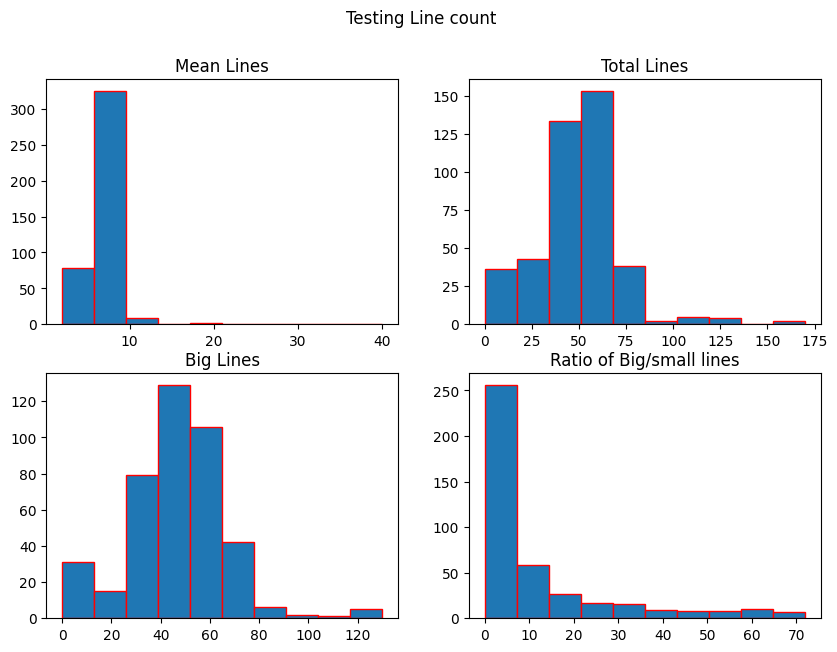

In [95]:
fig,axs = plt.subplots(2,2,figsize=(10,7))
fig.suptitle('Testing Line count')

axs[0,0].hist(df_clines['mean_lines'],edgecolor='red')
axs[0,0].set_title('Mean Lines')
axs[0,1].hist(df_clines['total_lines'],edgecolor='red')
axs[0,1].set_title('Total Lines')
axs[1,0].hist(df_clines['big_lines'],edgecolor='red')
axs[1,0].set_title('Big Lines')
axs[1,1].hist(df_clines['ratio_of_blsl'],edgecolor='red')
axs[1,1].set_title('Ratio of Big/small lines')


In [100]:
tokenizer = Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~\t',char_level=False)
tokenizer.fit_on_texts([all_dua_songs_newline.Songs.iloc[1].replace('\n',' \n ')])
tokenizer.word_index

{'\n': 1,
 'to': 2,
 'be': 3,
 'we': 4,
 'scared': 5,
 'lonely': 6,
 'were': 7,
 'the': 8,
 'holding': 9,
 'our': 10,
 'is': 11,
 'me': 12,
 'tonight': 13,
 'cause': 14,
 'and': 15,
 'for': 16,
 'it': 17,
 'on': 18,
 'all': 19,
 'just': 20,
 'only': 21,
 'reason': 22,
 'youre': 23,
 'ooh': 24,
 'wonder': 25,
 'keep': 26,
 'losing': 27,
 'somebody': 28,
 'better': 29,
 'why': 30,
 'bodies': 31,
 'are': 32,
 'both': 33,
 'minds': 34,
 'like': 35,
 'us': 36,
 'how': 37,
 'its': 38,
 'was': 39,
 'fights': 40,
 'slamming': 41,
 'doors': 42,
 'magnifying': 43,
 'flaws': 44,
 'i': 45,
 'what': 46,
 'coming': 47,
 'back': 48,
 'more': 49,
 'do': 50,
 'need': 51,
 'feel': 52,
 'alright': 53,
 'of': 54,
 'even': 55,
 'when': 56,
 'know': 57,
 'wrong': 58,
 'along': 59,
 'tell': 60,
 'can': 61,
 'eh': 62,
 'great': 63,
 'at': 64,
 'very': 65,
 'start': 66,
 'hands': 67,
 'each': 68,
 'other': 69,
 'couldnt': 70,
 'stand': 71,
 'far': 72,
 'apart': 73,
 'closer': 74,
 'now': 75,
 'picking': 76,
 '

In [105]:
list(all_dua_lyrics)

['Line_Lyrics', 'NumWords', 'Normalize_Lyrics']

In [106]:
lines=[]
for line in all_dua_lyrics["Line_Lyrics"]:
    print(line)
    token_list = tokenizer.texts_to_sequences([line])[0]
    print('--'*25)
    print(token_list)
    print('--'*25)

    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        print(n_gram_sequence)     

one one one one one
--------------------------------------------------
[]
--------------------------------------------------
talkin in my sleep at night makin myself crazy
--------------------------------------------------
[64]
--------------------------------------------------
wrote it down and read it out hopin it would save me
--------------------------------------------------
[17, 15, 17, 85, 17, 12]
--------------------------------------------------
[17, 15]
[17, 15, 17]
[17, 15, 17, 85]
[17, 15, 17, 85, 17]
[17, 15, 17, 85, 17, 12]
my love he makes me feel like nobody else nobody else
--------------------------------------------------
[12, 52, 35]
--------------------------------------------------
[12, 52]
[12, 52, 35]
but my love he doesnt love me so i tell myself i tell myself
--------------------------------------------------
[12, 45, 60, 45, 60]
--------------------------------------------------
[12, 45]
[12, 45, 60]
[12, 45, 60, 45]
[12, 45, 60, 45, 60]
one dont pick up the 

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [108]:
def ngram(token_list):
    ng = []
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        ng.append(n_gram_sequence)
    return ng

all_dua_songs.iloc[[0]].Song_Lyrics.iloc[0]

'one one one one one talkin in my sleep at night makin myself crazy wrote it down and read it out hopin it would save me my love he makes me feel like nobody else nobody else but my love he doesnt love me so i tell myself i tell myself one dont pick up the phone you know hes only callin cause hes drunk and alone two dont let him in youll have to kick him out again three dont be his friend you know youre gonna wake up in his bed in the morning and if youre under him you aint gettin over him i got new rules i count em i got new rules i count em i gotta tell them to myself i got new rules i count em i gotta tell them to myself i keep pushin forwards but he keeps pullin me backwards now im standin back from it i finally see the pattern but my love he doesnt love me so i tell myself i tell myself i do i do i do one dont pick up the phone you know hes only callin cause hes drunk and alone two dont let him in youll have to kick him out again three dont be his friend you know youre gonna wake 

In [116]:
# all_dua_songs

In [122]:
from keras_preprocessing.sequence import pad_sequences

def seqform(data):
  
    tokenise = Tokenizer()
    input_sequences = []
    corpus = []
    k=0

    for i in range(0,len(df)):
        text = df.iloc[[i]].Song_Lyrics.iloc[0]
        if type(text)==float:
            pass
        else:
            text = text.lower().split("\n")
            text = [re.sub(r'\d+', '', i) for i in text]
            text = list(set(text))
        if text==' ':
            pass
        else:
            corpus.extend(text)
            k+=1
            
    tokenise.fit_on_texts(corpus)
    for line in corpus:
        token_list = tokenise.texts_to_sequences([line])[0]
        input_sequences.extend(ngram(token_list))


    max_sequence_len = max([len(x) for x in input_sequences])
    input_sequences = np.array(pad_sequences(input_sequences,
                       maxlen = max_sequence_len, padding='pre'))

    predictors, label = input_sequences[:,:-1],input_sequences[:,-1]
    fin_data = pd.DataFrame(np.hstack((predictors, label.reshape(-1,1))),columns=np.hstack((np.arange(1,predictors.shape[1]+1),np.array(['label']))))
    total_words = len(tokenise.word_index) + 1
    print('{} number of lyrics inputted'.format(k))

    return fin_data,tokenise,max_sequence_len,total_words,predictors,label

df = all_dua_songs
# df = all_dua_lyrics
fdf,tokenise,max_sequence_len,total_words,predictors,label = seqform(df)
print(fdf.shape,max_sequence_len,total_words)



408 number of lyrics inputted
(132219, 896) 896 4216


In [124]:
fdf.head(5)

1  2  3  4  5  6  7  8  9  10  ...  887  888  889  890  891  892  893  894  \
0  0  0  0  0  0  0  0  0  0   0  ...    0    0    0    0    0    0    0    0   
1  0  0  0  0  0  0  0  0  0   0  ...    0    0    0    0    0    0    0   26   
2  0  0  0  0  0  0  0  0  0   0  ...    0    0    0    0    0    0   26   26   
3  0  0  0  0  0  0  0  0  0   0  ...    0    0    0    0    0   26   26   26   
4  0  0  0  0  0  0  0  0  0   0  ...    0    0    0    0   26   26   26   26   

   895  label  
0   26     26  
1   26     26  
2   26     26  
3   26     26  
4   26    605  

[5 rows x 896 columns]

In [125]:
# Saving to 
fdf.to_csv('fin_df.csv',index=False)

In [126]:
print(fdf.shape)
print(fdf.values.max())

(132219, 896)
4215


In [136]:
dataX = [fdf.iloc[i,0:895].tolist() for i in range(0,fdf.shape[0])]
dataY = [fdf.iloc[i,895] for i in range(0,fdf.shape[0])]
print(len(dataX))
print(len(dataY))

132219
132219


In [137]:
# reshape X to be [samples, time steps, features]
X = np.reshape(dataX, (132219, 895, 1))

# one hot encode the output variable
y = np_utils.to_categorical(dataY)

In [138]:
len(y[0])

4216

In [139]:
print(predictors.shape)
print(label.shape)
print(X.shape,y.shape)
print(total_words,max_sequence_len)

(132219, 895)
(132219,)
(132219, 895, 1) (132219, 4216)
4216 896


In [140]:
model = Sequential()
model.add(Embedding(total_words, 150, input_length=max_sequence_len-1))
# Add an LSTM Layer
model.add(Bidirectional(LSTM(150, return_sequences=True)))  
# A dropout layer for regularisation
model.add(Dropout(0.2))
# Add another LSTM Layer
model.add(LSTM(100)) 
model.add(Dense(total_words/2, activation='relu'))  
# In the last layer, the shape should be equal to the total number of words present in our corpus
model.add(Dense(y.shape[1], activation='softmax'))
#model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')  #(# Pick a loss function and an optimizer)
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 895, 150)          632400    
                                                                 
 bidirectional_1 (Bidirectio  (None, 895, 300)         361200    
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 895, 300)          0         
                                                                 
 lstm_3 (LSTM)               (None, 100)               160400    
                                                                 
 dense_2 (Dense)             (None, 2108)              212908    
                                                                 
 dense_3 (Dense)             (None, 4216)              8891544   
                                                      

In [141]:
# define the checkpoint
filepath="weights-improvement-{epoch:02d}-{loss:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

In [143]:
# model.fit(X,y, epochs= 60,callbacks=callbacks_list)

Epoch 1/60
4132/4132 [==============================] - ETA: 0s - loss: 1.6386 - accuracy: 0.6460
Epoch 1: loss improved from 2.16854 to 1.63862, saving model to weights-improvement-01-1.6386.hdf5
4132/4132 [==============================] - 7783s 2s/step - loss: 1.6386 - accuracy: 0.6460
Epoch 2/60
4132/4132 [==============================] - ETA: 0s - loss: 1.4223 - accuracy: 0.6836
Epoch 2: loss improved from 1.63862 to 1.42232, saving model to weights-improvement-02-1.4223.hdf5
4132/4132 [==============================] - 8897s 2s/step - loss: 1.4223 - accuracy: 0.6836
Epoch 3/60
3556/4132 [========================>.....] - ETA: 1:53:08 - loss: 1.2459 - accuracy: 0.7146

KeyboardInterrupt: 

In [151]:
# weights-improvement-02-1.4223.hdf5
#37-4.9734
# filename = "weights-improvement-02-1.4223.hdf5"
# model.load_weights(filename)
# model.compile(loss='categorical_crossentropy', optimizer='adam',metrics='accuracy')
# model.fit(X, y, epochs=20, callbacks=callbacks_list)

Epoch 1/20
  14/4132 [..............................] - ETA: 1:27:09 - loss: 1.2481 - accuracy: 0.7098

KeyboardInterrupt: 

In [152]:
# model.save_weights(Data_dir+'my_model_weights.h5')
# model.save(Data_dir+'my_model.h5')

In [153]:
# model.save(Data_dir + 'saved_model/my_model')


INFO:tensorflow:Assets written to: datasaved_model/my_model/assets


INFO:tensorflow:Assets written to: datasaved_model/my_model/assets


In [154]:

def make_lyrics(seed_text, next_words):
    pred_index=[]
    for i in range(next_words):
        token_list = tokenise.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list],
                     maxlen=max_sequence_len-1,padding='pre')
        #print(token_list.shape)
        token_list = np.reshape(token_list, (1, max_sequence_len-1, 1))
        predicted = model.predict(token_list, verbose=0)
        predicted_index =  np.argmax(predicted)
        pred_index.append(predicted_index)
        


        #predicted_index=1
        output_word = ""
        for word, index in tokenise.word_index.items():
            if index == predicted_index:
                output_word = word
                break
        seed_text += " " + output_word
    print(seed_text)
    return seed_text


In [200]:
max_sequence_len = 896

896

In [155]:

# reverse_word_map = dict(map(reversed, tokenise.word_index.items()))
# start = np.random.randint(0, len(dataX)-1)
# pattern = dataX[start]
# pattern_val = [i for i in pattern if i>0]
# print("Seed:")
# print(' '.join([reverse_word_map.get(value) for value in pattern_val]))
# seed_text = [reverse_word_map.get(value)+' ' for value in pattern_val]
     


Seed:
one kiss is all it takes fallin in love with me possibilities i look like all you need let me take the night i love real easy and i know that youll still wanna see me on the sunday morning music real loud let me love you while the moon is still out something in you lit up heaven in me the feeling wont let me sleep cause im lost in the way you move the way you feel one kiss is all it takes fallin in love with me possibilities i look like all you need one kiss is all it takes fallin in love with me possibilities i look like all you need one one one one i just wanna feel your skin on mine feel your eyes do the exploring passion in the message when you smile take my time something in you lit up heaven


In [172]:
# line1 = make_lyrics('Hey baby',100)


Hey baby turn it louder jealous a little louder lean though a word to sooth me id be apart closer now now now now now now now this current between us this flow this feeling tonight i know that youll still wanna see me on the sunday morning music real loud let me love you while the moon is still out something in you ou ou lit up heaven in me e e the feeling wont let me slee ee eep cause im lost in the way you move the way you feel one kiss is all it takes fallin in love


In [177]:
# line2 = make_lyrics('My Love',10)


My Love isnt for sure i like falling of it talk but


In [182]:
# line3 = make_lyrics('jealousy',80)


jealousy it mean yeah we dont know how it seems to sooth me id be apart out of these looking at this is all i want you to myself no i cant resist cause i wouldve stayed at home cause i i wouldve yeah i wouldve yeah i wouldve stayed at home cause i i wouldve yeah i wouldve yeah i wouldve stayed at home cause i i wouldve yeah i wouldve yeah i wouldve yeah i wouldve stayed at home


In [159]:
# line4 = make_lyrics('Kill me',8)


However told me push it felt me i dont


In [160]:
# line5 = make_lyrics('Why god',5)


really wanna see me on the night


In [161]:

# import pickle

# saving
# with open(Data_dir+'tokenizer.pickle', 'wb') as handle:
#     pickle.dump(tokenise, handle, protocol=pickle.HIGHEST_PROTOCOL)

# loading
# with open('tokenizer.pickle', 'rb') as handle:
#    tokenizer = pickle.load(handle)


In [85]:
import pickle
import keras

Data_dir = "data"
# saving
# with open(Data_dir+'tokenizer.pickle', 'wb') as handle:
#     pickle.dump(tokenise, handle, protocol=pickle.HIGHEST_PROTOCOL)

# loading
with open(Data_dir + 'tokenizer.pickle', 'rb') as handle:
    tokenise = pickle.load(handle)
max_sequence_len = 896
model = keras.models.load_model(Data_dir + 'saved_model/my_model')

2022-12-13 00:21:36.094081: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
# import pickle
# import keras

# Data_dir = "data"
# # saving
# # with open(Data_dir+'tokenizer.pickle', 'wb') as handle:
# #     pickle.dump(tokenise, handle, protocol=pickle.HIGHEST_PROTOCOL)

# # loading
# with open(Data_dir + 'tokenizer.pickle', 'rb') as handle:
#     tokenise = pickle.load(handle)
# max_sequence_len = 896
# model = keras.models.load_model(Data_dir + 'saved_model/my_model')

In [ ]:
from keras_preprocessing.sequence import pad_sequences
import numpy as np
line1 = make_lyrics('Hey baby',100)


In [1]:
import pickle
import keras



Data_dir = "data"
with open(Data_dir + 'tokenizer.pickle', 'rb') as handle:
    tokenise = pickle.load(handle)
max_sequence_len = 896
model = keras.models.load_model(Data_dir + 'saved_model/my_model')

ModuleNotFoundError: No module named 'keras'